#### **Importing the Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

import warnings

warnings.filterwarnings("ignore")

#### **Setup Pandas Display Option**


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

#### **Reading the dataset**


In [4]:
df = pd.read_csv("df.csv")

#### **Exploring the dataset**


In [5]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,9/1/2020 17:00,4229730000000000.000,fraud_Bernier and Sons,kids_pets,41.170,Tyler,Mills,M,7838 Jason Squares,Elizabethtown,KY,42701,37.685,-85.878,48194,Surgeon,5/3/1990,649c78db0f69366c5aaf2a48c5e836cc,1378054835,38.370,-86.672,1
1,12/20/2020 6:31,4223710000000000000.000,fraud_McCullough LLC,misc_pos,51.890,Adam,Riddle,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,39.096,-84.643,177,Exhibition designer,5/30/1974,9e6905d44535d3428da8806bd67f5f07,1387521110,39.091,-84.116,1
2,10/18/2020 10:05,30176000000000.000,fraud_Durgan-Auer,misc_net,2.220,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,56592,47.538,-95.994,516,Applications developer,6/7/1966,db8a4c58cdc7d96d7f562605468f08b0,1382090733,47.285,-96.181,1
3,11/29/2020 5:16,675910000000.000,fraud_Berge LLC,gas_transport,87.210,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.136,-73.701,7987,Television/film/video producer,3/16/1964,a448f05beb449fea3c6a39c12afda474,1385702190,41.504,-73.220,1
4,11/19/2020 8:28,30093000000000.000,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,79.780,Jessica,Terry,F,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,38.621,-83.807,14228,Advertising account executive,3/26/1971,afe451cdfe4c87d6b4250bdd03333971,1384849723,39.043,-83.842,0


In [6]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], dtype='object')

In [7]:
df.shape

(159618, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159618 entries, 0 to 159617
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  159618 non-null  object 
 1   cc_num                 159618 non-null  float64
 2   merchant               159618 non-null  object 
 3   category               159618 non-null  object 
 4   amt                    159618 non-null  float64
 5   first                  159618 non-null  object 
 6   last                   159618 non-null  object 
 7   gender                 159618 non-null  object 
 8   street                 159618 non-null  object 
 9   city                   159618 non-null  object 
 10  state                  159618 non-null  object 
 11  zip                    159618 non-null  int64  
 12  lat                    159618 non-null  float64
 13  long                   159618 non-null  float64
 14  city_pop               159618 non-nu

In [9]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000
mean,416039644014534272.000,69.532,48868.351,38.543,-90.256,88758.059,1380660824.670,38.544,-90.257,0.899
std,1307281891662049536.000,165.488,26872.871,5.052,13.722,302700.402,5194127.354,5.087,13.734,0.302
min,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1371816915.000,19.027,-166.670,0.000
25%,180031000000000.000,9.560,26292.000,34.690,-96.809,741.000,1376025636.750,34.769,-96.943,1.000
50%,3518760000000000.000,47.080,48202.000,39.372,-87.592,2401.000,1380735492.000,39.375,-87.472,1.000
75%,4634960000000000.000,82.870,72042.000,41.895,-80.175,19408.000,1385849007.750,41.961,-80.284,1.000
max,4992350000000000000.000,21437.710,99921.000,65.690,-67.950,2906700.000,1388534364.000,66.644,-66.981,1.000


#### **Checking for null & duplicated values**


In [10]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

#### **Changing Transaction date & time format**


In [12]:
df["trans_date_trans_time"] = pd.to_datetime(
    df["trans_date_trans_time"], format="mixed"
)

In [13]:
df["hour"] = df["trans_date_trans_time"].dt.hour
df["day"] = df["trans_date_trans_time"].dt.day_name()
df["month"] = df["trans_date_trans_time"].dt.month
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-09-01 17:00:00,4229730000000000.000,fraud_Bernier and Sons,kids_pets,41.170,Tyler,Mills,M,7838 Jason Squares,Elizabethtown,KY,42701,37.685,-85.878,48194,Surgeon,5/3/1990,649c78db0f69366c5aaf2a48c5e836cc,1378054835,38.370,-86.672,1,17,Tuesday,9
1,2020-12-20 06:31:00,4223710000000000000.000,fraud_McCullough LLC,misc_pos,51.890,Adam,Riddle,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,39.096,-84.643,177,Exhibition designer,5/30/1974,9e6905d44535d3428da8806bd67f5f07,1387521110,39.091,-84.116,1,6,Sunday,12
2,2020-10-18 10:05:00,30176000000000.000,fraud_Durgan-Auer,misc_net,2.220,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,56592,47.538,-95.994,516,Applications developer,6/7/1966,db8a4c58cdc7d96d7f562605468f08b0,1382090733,47.285,-96.181,1,10,Sunday,10
3,2020-11-29 05:16:00,675910000000.000,fraud_Berge LLC,gas_transport,87.210,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.136,-73.701,7987,Television/film/video producer,3/16/1964,a448f05beb449fea3c6a39c12afda474,1385702190,41.504,-73.220,1,5,Sunday,11
4,2020-11-19 08:28:00,30093000000000.000,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,79.780,Jessica,Terry,F,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,38.621,-83.807,14228,Advertising account executive,3/26/1971,afe451cdfe4c87d6b4250bdd03333971,1384849723,39.043,-83.842,0,8,Thursday,11


#### **Removing "fraud\_" from in front of merchant name**


In [14]:
df["merchant"] = df["merchant"].apply(lambda x: x.replace("fraud_", ""))

In [15]:
df[["merchant"]].head()

,merchant
0,Bernier and Sons
1,McCullough LLC
2,Durgan-Auer
3,Berge LLC
4,"Johnson, Runolfsdottir and Mayer"


#### **Finding the current age of custumer**


In [16]:
df["dob"] = pd.to_datetime(df["dob"], format="mixed")
df["age_cust"] = (df["trans_date_trans_time"].dt.year - df["dob"].dt.year).astype(int)
df.drop(columns="dob", inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,2020-09-01 17:00:00,4229730000000000.000,Bernier and Sons,kids_pets,41.170,Tyler,Mills,M,7838 Jason Squares,Elizabethtown,KY,42701,37.685,-85.878,48194,Surgeon,649c78db0f69366c5aaf2a48c5e836cc,1378054835,38.370,-86.672,1,17,Tuesday,9,30
1,2020-12-20 06:31:00,4223710000000000000.000,McCullough LLC,misc_pos,51.890,Adam,Riddle,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,39.096,-84.643,177,Exhibition designer,9e6905d44535d3428da8806bd67f5f07,1387521110,39.091,-84.116,1,6,Sunday,12,46
2,2020-10-18 10:05:00,30176000000000.000,Durgan-Auer,misc_net,2.220,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,56592,47.538,-95.994,516,Applications developer,db8a4c58cdc7d96d7f562605468f08b0,1382090733,47.285,-96.181,1,10,Sunday,10,54
3,2020-11-29 05:16:00,675910000000.000,Berge LLC,gas_transport,87.210,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.136,-73.701,7987,Television/film/video producer,a448f05beb449fea3c6a39c12afda474,1385702190,41.504,-73.220,1,5,Sunday,11,56
4,2020-11-19 08:28:00,30093000000000.000,"Johnson, Runolfsdottir and Mayer",misc_net,79.780,Jessica,Terry,F,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,38.621,-83.807,14228,Advertising account executive,afe451cdfe4c87d6b4250bdd03333971,1384849723,39.043,-83.842,0,8,Thursday,11,49


#### **Finding distance between customer's address and merchant**


In [17]:
df["lat_dist"] = abs(round(df["merch_lat"] - df["lat"], 2))
df["long_dist"] = abs(round(df["merch_long"] - df["long"], 2))

In [18]:
df.drop(
    columns=["lat", "long", "merch_lat", "merch_long", "trans_date_trans_time"],
    inplace=True,
)

In [19]:
df.describe()

,cc_num,amt,zip,city_pop,unix_time,is_fraud,hour,month,age_cust,lat_dist,long_dist
count,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000
mean,416039644014534272.000,69.532,48868.351,88758.059,1380660824.670,0.899,12.824,9.502,46.641,0.500,0.500
std,1307281891662049536.000,165.488,26872.871,302700.402,5194127.354,0.302,6.804,1.976,17.449,0.288,0.289
min,60416207185.000,1.000,1257.000,23.000,1371816915.000,0.000,0.000,6.000,15.000,0.000,0.000
25%,180031000000000.000,9.560,26292.000,741.000,1376025636.750,1.000,7.000,8.000,33.000,0.250,0.250
50%,3518760000000000.000,47.080,48202.000,2401.000,1380735492.000,1.000,14.000,10.000,45.000,0.500,0.500
75%,4634960000000000.000,82.870,72042.000,19408.000,1385849007.750,1.000,19.000,11.000,58.000,0.750,0.750
max,4992350000000000000.000,21437.710,99921.000,2906700.000,1388534364.000,1.000,23.000,12.000,96.000,1.000,1.000


In [20]:
df.describe(include="object")

,merchant,category,first,last,gender,street,city,state,job,trans_num,day
count,159618,159618,159618,159618,159618,159618,159618,159618,159618,159618,159618
unique,693,14,340,471,2,923,848,50,478,159618,7
top,Kilback LLC,gas_transport,Christopher,Smith,F,4293 Ramirez Squares,Birmingham,TX,Film/video editor,649c78db0f69366c5aaf2a48c5e836cc,Monday
freq,504,16089,3291,3430,87463,430,696,11549,1191,1,33062


In [21]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,trans_num,unix_time,is_fraud,hour,day,month,age_cust,lat_dist,long_dist
0,4229730000000000.000,Bernier and Sons,kids_pets,41.170,Tyler,Mills,M,7838 Jason Squares,Elizabethtown,KY,42701,48194,Surgeon,649c78db0f69366c5aaf2a48c5e836cc,1378054835,1,17,Tuesday,9,30,0.690,0.790
1,4223710000000000000.000,McCullough LLC,misc_pos,51.890,Adam,Riddle,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,177,Exhibition designer,9e6905d44535d3428da8806bd67f5f07,1387521110,1,6,Sunday,12,46,0.010,0.530
2,30176000000000.000,Durgan-Auer,misc_net,2.220,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,56592,516,Applications developer,db8a4c58cdc7d96d7f562605468f08b0,1382090733,1,10,Sunday,10,54,0.250,0.190
3,675910000000.000,Berge LLC,gas_transport,87.210,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,7987,Television/film/video producer,a448f05beb449fea3c6a39c12afda474,1385702190,1,5,Sunday,11,56,0.370,0.480
4,30093000000000.000,"Johnson, Runolfsdottir and Mayer",misc_net,79.780,Jessica,Terry,F,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,14228,Advertising account executive,afe451cdfe4c87d6b4250bdd03333971,1384849723,0,8,Thursday,11,49,0.420,0.040


#### **Encoding using One Hot Encoder**


In [22]:
df_encoded = pd.get_dummies(df, columns=["gender", "is_fraud"], drop_first=True)

In [23]:
df_encoded.rename(
    columns={"gender_M": "is_male", "is_fraud_1": "is_fraud"}, inplace=True
)

In [24]:
df_encoded.head()

,cc_num,merchant,category,amt,first,last,street,city,state,zip,city_pop,job,trans_num,unix_time,hour,day,month,age_cust,lat_dist,long_dist,is_male,is_fraud
0,4229730000000000.000,Bernier and Sons,kids_pets,41.170,Tyler,Mills,7838 Jason Squares,Elizabethtown,KY,42701,48194,Surgeon,649c78db0f69366c5aaf2a48c5e836cc,1378054835,17,Tuesday,9,30,0.690,0.790,True,True
1,4223710000000000000.000,McCullough LLC,misc_pos,51.890,Adam,Riddle,27718 Mason Bypass,Mount Saint Joseph,OH,45051,177,Exhibition designer,9e6905d44535d3428da8806bd67f5f07,1387521110,6,Sunday,12,46,0.010,0.530,True,True
2,30176000000000.000,Durgan-Auer,misc_net,2.220,Rebecca,Butler,0665 Lisa Alley,Winger,MN,56592,516,Applications developer,db8a4c58cdc7d96d7f562605468f08b0,1382090733,10,Sunday,10,54,0.250,0.190,False,True
3,675910000000.000,Berge LLC,gas_transport,87.210,Christopher,Henry,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,7987,Television/film/video producer,a448f05beb449fea3c6a39c12afda474,1385702190,5,Sunday,11,56,0.370,0.480,True,True
4,30093000000000.000,"Johnson, Runolfsdottir and Mayer",misc_net,79.780,Jessica,Terry,6412 Elizabeth Gardens Suite 633,Maysville,KY,41056,14228,Advertising account executive,afe451cdfe4c87d6b4250bdd03333971,1384849723,8,Thursday,11,49,0.420,0.040,False,False


In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159618 entries, 0 to 159617
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     159618 non-null  float64
 1   merchant   159618 non-null  object 
 2   category   159618 non-null  object 
 3   amt        159618 non-null  float64
 4   first      159618 non-null  object 
 5   last       159618 non-null  object 
 6   street     159618 non-null  object 
 7   city       159618 non-null  object 
 8   state      159618 non-null  object 
 9   zip        159618 non-null  int64  
 10  city_pop   159618 non-null  int64  
 11  job        159618 non-null  object 
 12  trans_num  159618 non-null  object 
 13  unix_time  159618 non-null  int64  
 14  hour       159618 non-null  int32  
 15  day        159618 non-null  object 
 16  month      159618 non-null  int32  
 17  age_cust   159618 non-null  int32  
 18  lat_dist   159618 non-null  float64
 19  long_dist  159618 non-n

#### **Counting Number of Fraud and not Fraud**


In [26]:
fraud_counts = df_encoded["is_fraud"].value_counts()
print(fraud_counts)

is_fraud
True     143444
False     16174
Name: count, dtype: int64


## **Visualization**


#### **Fraud By Gender**


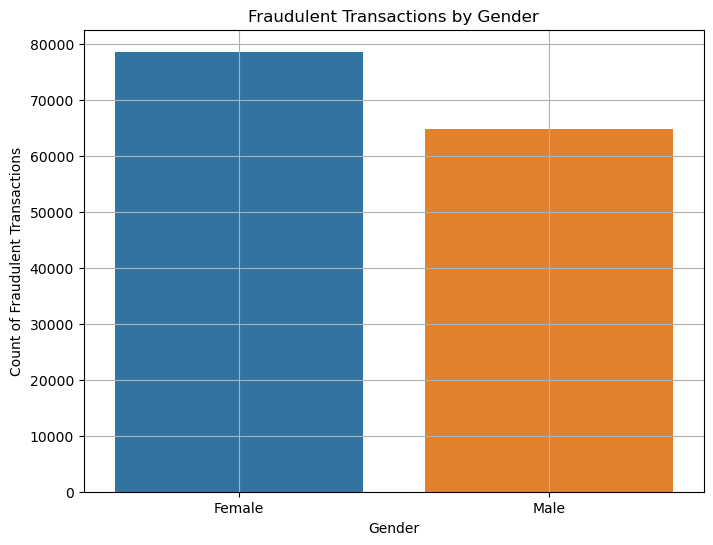

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x="is_male", y="is_fraud", data=df_encoded, estimator=sum, ci=None)
plt.title("Fraudulent Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks([0, 1], ["Female", "Male"])
plt.grid(True)
plt.show()

#### **Fraud Vs Transaction Amout**


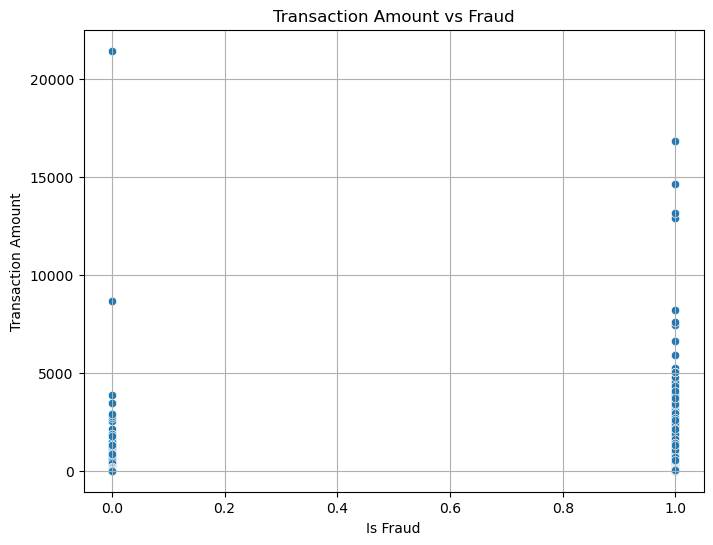

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="is_fraud", y="amt", data=df_encoded)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.show()

#### **Top 10 Merchants with with most Fraudulent Transactions**


In [29]:
fraud_count_merch = df_encoded.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kilback LLC'),
  Text(1, 0, 'Cormier LLC'),
  Text(2, 0, 'Schumm PLC'),
  Text(3, 0, 'Dickinson Ltd'),
  Text(4, 0, 'Boyer PLC'),
  Text(5, 0, 'Kuhn LLC'),
  Text(6, 0, 'Parisian and Sons'),
  Text(7, 0, 'Raynor, Reinger and Hagenes'),
  Text(8, 0, 'Streich, Hansen and Veum'),
  Text(9, 0, 'Huels-Hahn')])

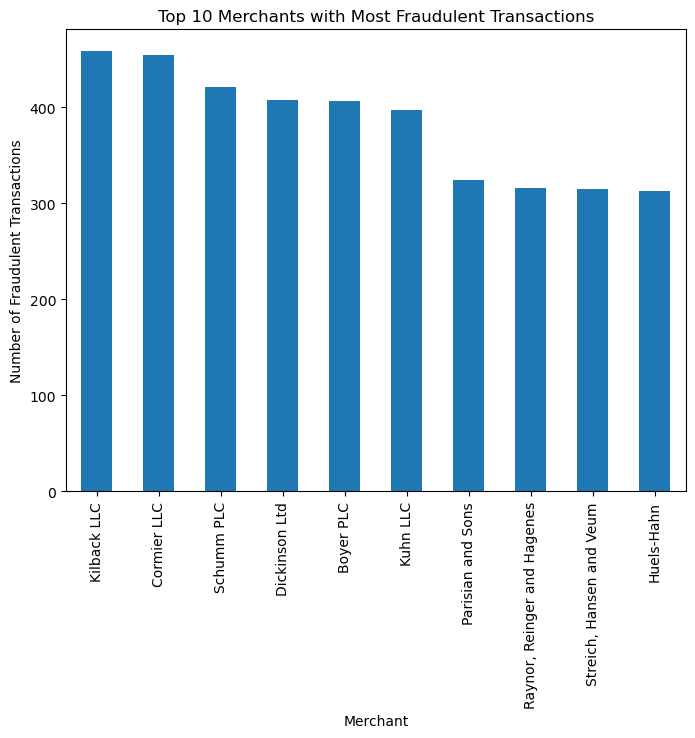

In [30]:
plt.figure(figsize=(8, 6))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)

#### **Top 10 Categories with with most Fraudulent Transactions**


In [31]:
fraud_counts_cat = df_encoded.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'gas_transport'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'home'),
  Text(3, 0, 'shopping_pos'),
  Text(4, 0, 'kids_pets'),
  Text(5, 0, 'shopping_net'),
  Text(6, 0, 'entertainment'),
  Text(7, 0, 'personal_care'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'health_fitness')])

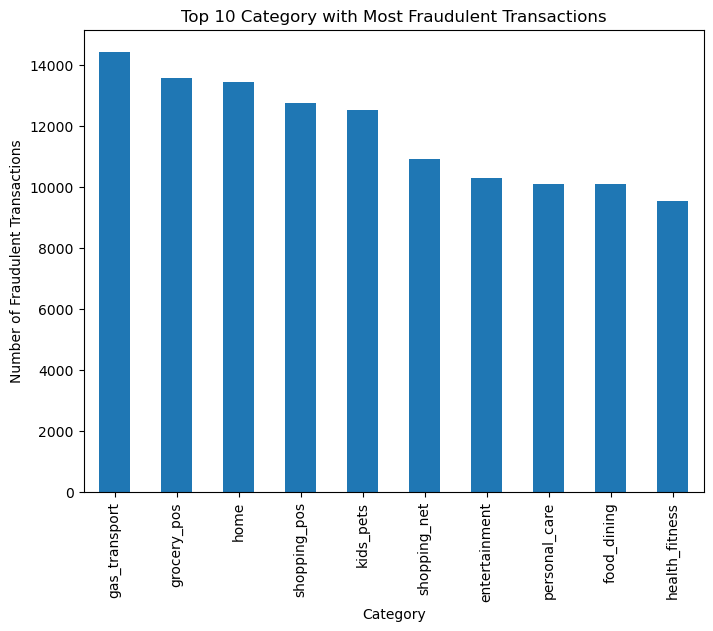

In [32]:
plt.figure(figsize=(8, 6))
top10_cat.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)

#### **Top 10 Cities with with most Fraudulent Transactions**


In [33]:
fraud_counts_city = df_encoded.groupby("city")["is_fraud"].sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Birmingham'),
  Text(1, 0, 'San Antonio'),
  Text(2, 0, 'Phoenix'),
  Text(3, 0, 'Utica'),
  Text(4, 0, 'Meridian'),
  Text(5, 0, 'Thomas'),
  Text(6, 0, 'Warren'),
  Text(7, 0, 'Conway'),
  Text(8, 0, 'Fulton'),
  Text(9, 0, 'Cleveland')])

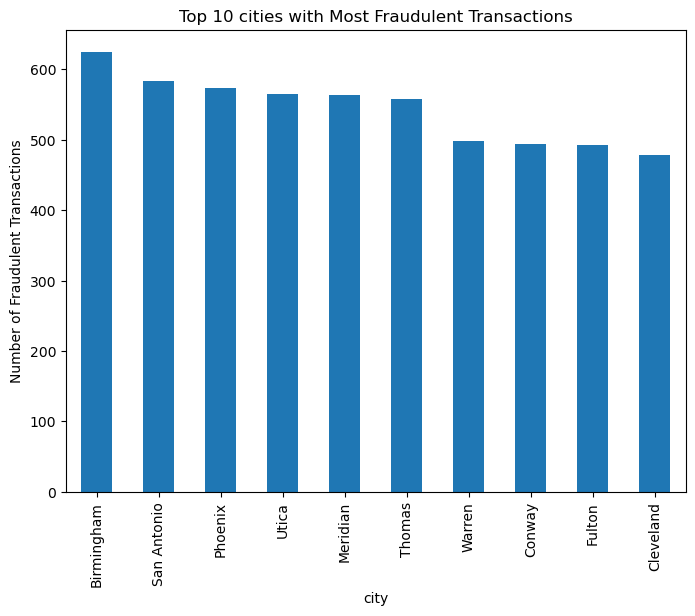

In [34]:
plt.figure(figsize=(8, 6))
fraud_counts_city.nlargest(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)

#### **Top 10 Jobs with with most Fraudulent Transactions**


In [35]:
fraud_counts_job = df_encoded.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Film/video editor'),
  Text(1, 0, 'Exhibition designer'),
  Text(2, 0, 'Naval architect'),
  Text(3, 0, 'Surveyor, land/geomatics'),
  Text(4, 0, 'Materials engineer'),
  Text(5, 0, 'Designer, ceramics/pottery'),
  Text(6, 0, 'Environmental consultant'),
  Text(7, 0, 'Systems developer'),
  Text(8, 0, 'IT trainer'),
  Text(9, 0, 'Financial adviser')])

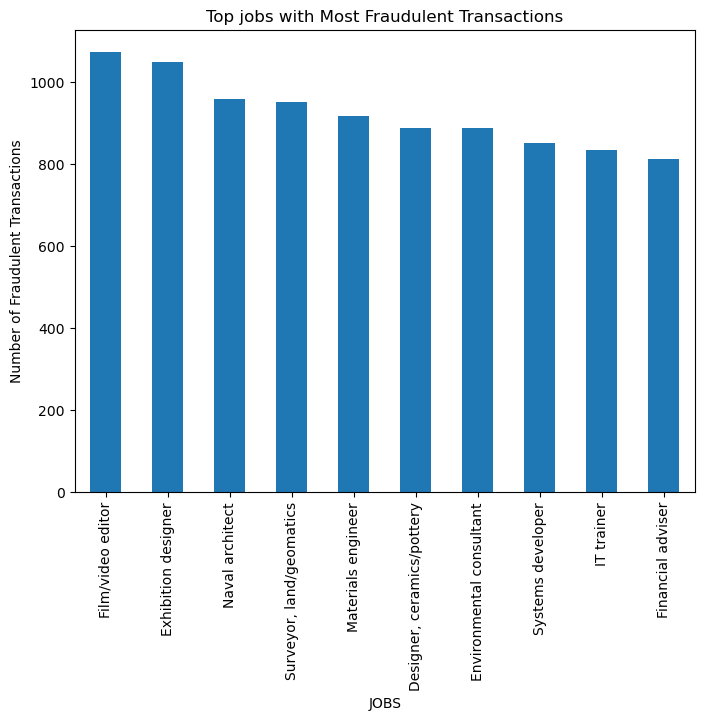

In [36]:
plt.figure(figsize=(8, 6))
top10_job.plot(kind="bar")
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)

#### **Dropping columns that are not relevant to predicting fraudulent transaction**


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159618 entries, 0 to 159617
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     159618 non-null  float64
 1   merchant   159618 non-null  object 
 2   category   159618 non-null  object 
 3   amt        159618 non-null  float64
 4   first      159618 non-null  object 
 5   last       159618 non-null  object 
 6   street     159618 non-null  object 
 7   city       159618 non-null  object 
 8   state      159618 non-null  object 
 9   zip        159618 non-null  int64  
 10  city_pop   159618 non-null  int64  
 11  job        159618 non-null  object 
 12  trans_num  159618 non-null  object 
 13  unix_time  159618 non-null  int64  
 14  hour       159618 non-null  int32  
 15  day        159618 non-null  object 
 16  month      159618 non-null  int32  
 17  age_cust   159618 non-null  int32  
 18  lat_dist   159618 non-null  float64
 19  long_dist  159618 non-n

In [38]:
df_encoded.drop(
    columns=[
        "street",
        "state",
        "first",
        "last",
        "trans_num",
        "unix_time",
        "city_pop",
        "city",
    ],
    inplace=True,
)

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159618 entries, 0 to 159617
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     159618 non-null  float64
 1   merchant   159618 non-null  object 
 2   category   159618 non-null  object 
 3   amt        159618 non-null  float64
 4   zip        159618 non-null  int64  
 5   job        159618 non-null  object 
 6   hour       159618 non-null  int32  
 7   day        159618 non-null  object 
 8   month      159618 non-null  int32  
 9   age_cust   159618 non-null  int32  
 10  lat_dist   159618 non-null  float64
 11  long_dist  159618 non-null  float64
 12  is_male    159618 non-null  bool   
 13  is_fraud   159618 non-null  bool   
dtypes: bool(2), float64(4), int32(3), int64(1), object(4)
memory usage: 13.1+ MB


In [40]:
df = df_encoded.drop(
    columns=[
        "merchant",
        "category",
        "job",
        "day",
        "age_cust",
        "is_male",
    ]
)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159618 entries, 0 to 159617
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     159618 non-null  float64
 1   amt        159618 non-null  float64
 2   zip        159618 non-null  int64  
 3   hour       159618 non-null  int32  
 4   month      159618 non-null  int32  
 5   lat_dist   159618 non-null  float64
 6   long_dist  159618 non-null  float64
 7   is_fraud   159618 non-null  bool   
dtypes: bool(1), float64(4), int32(2), int64(1)
memory usage: 7.5 MB


#### **Correlation Matrix**


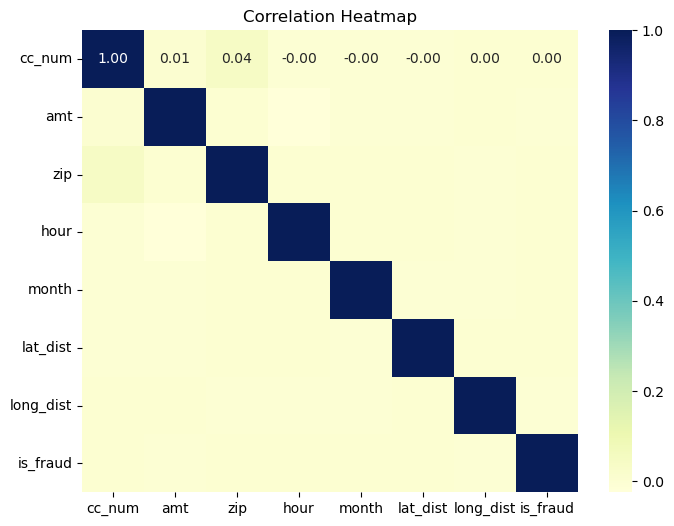

In [42]:
correlation_matrix = df.corr()

# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **Scatter Plot of all Features**


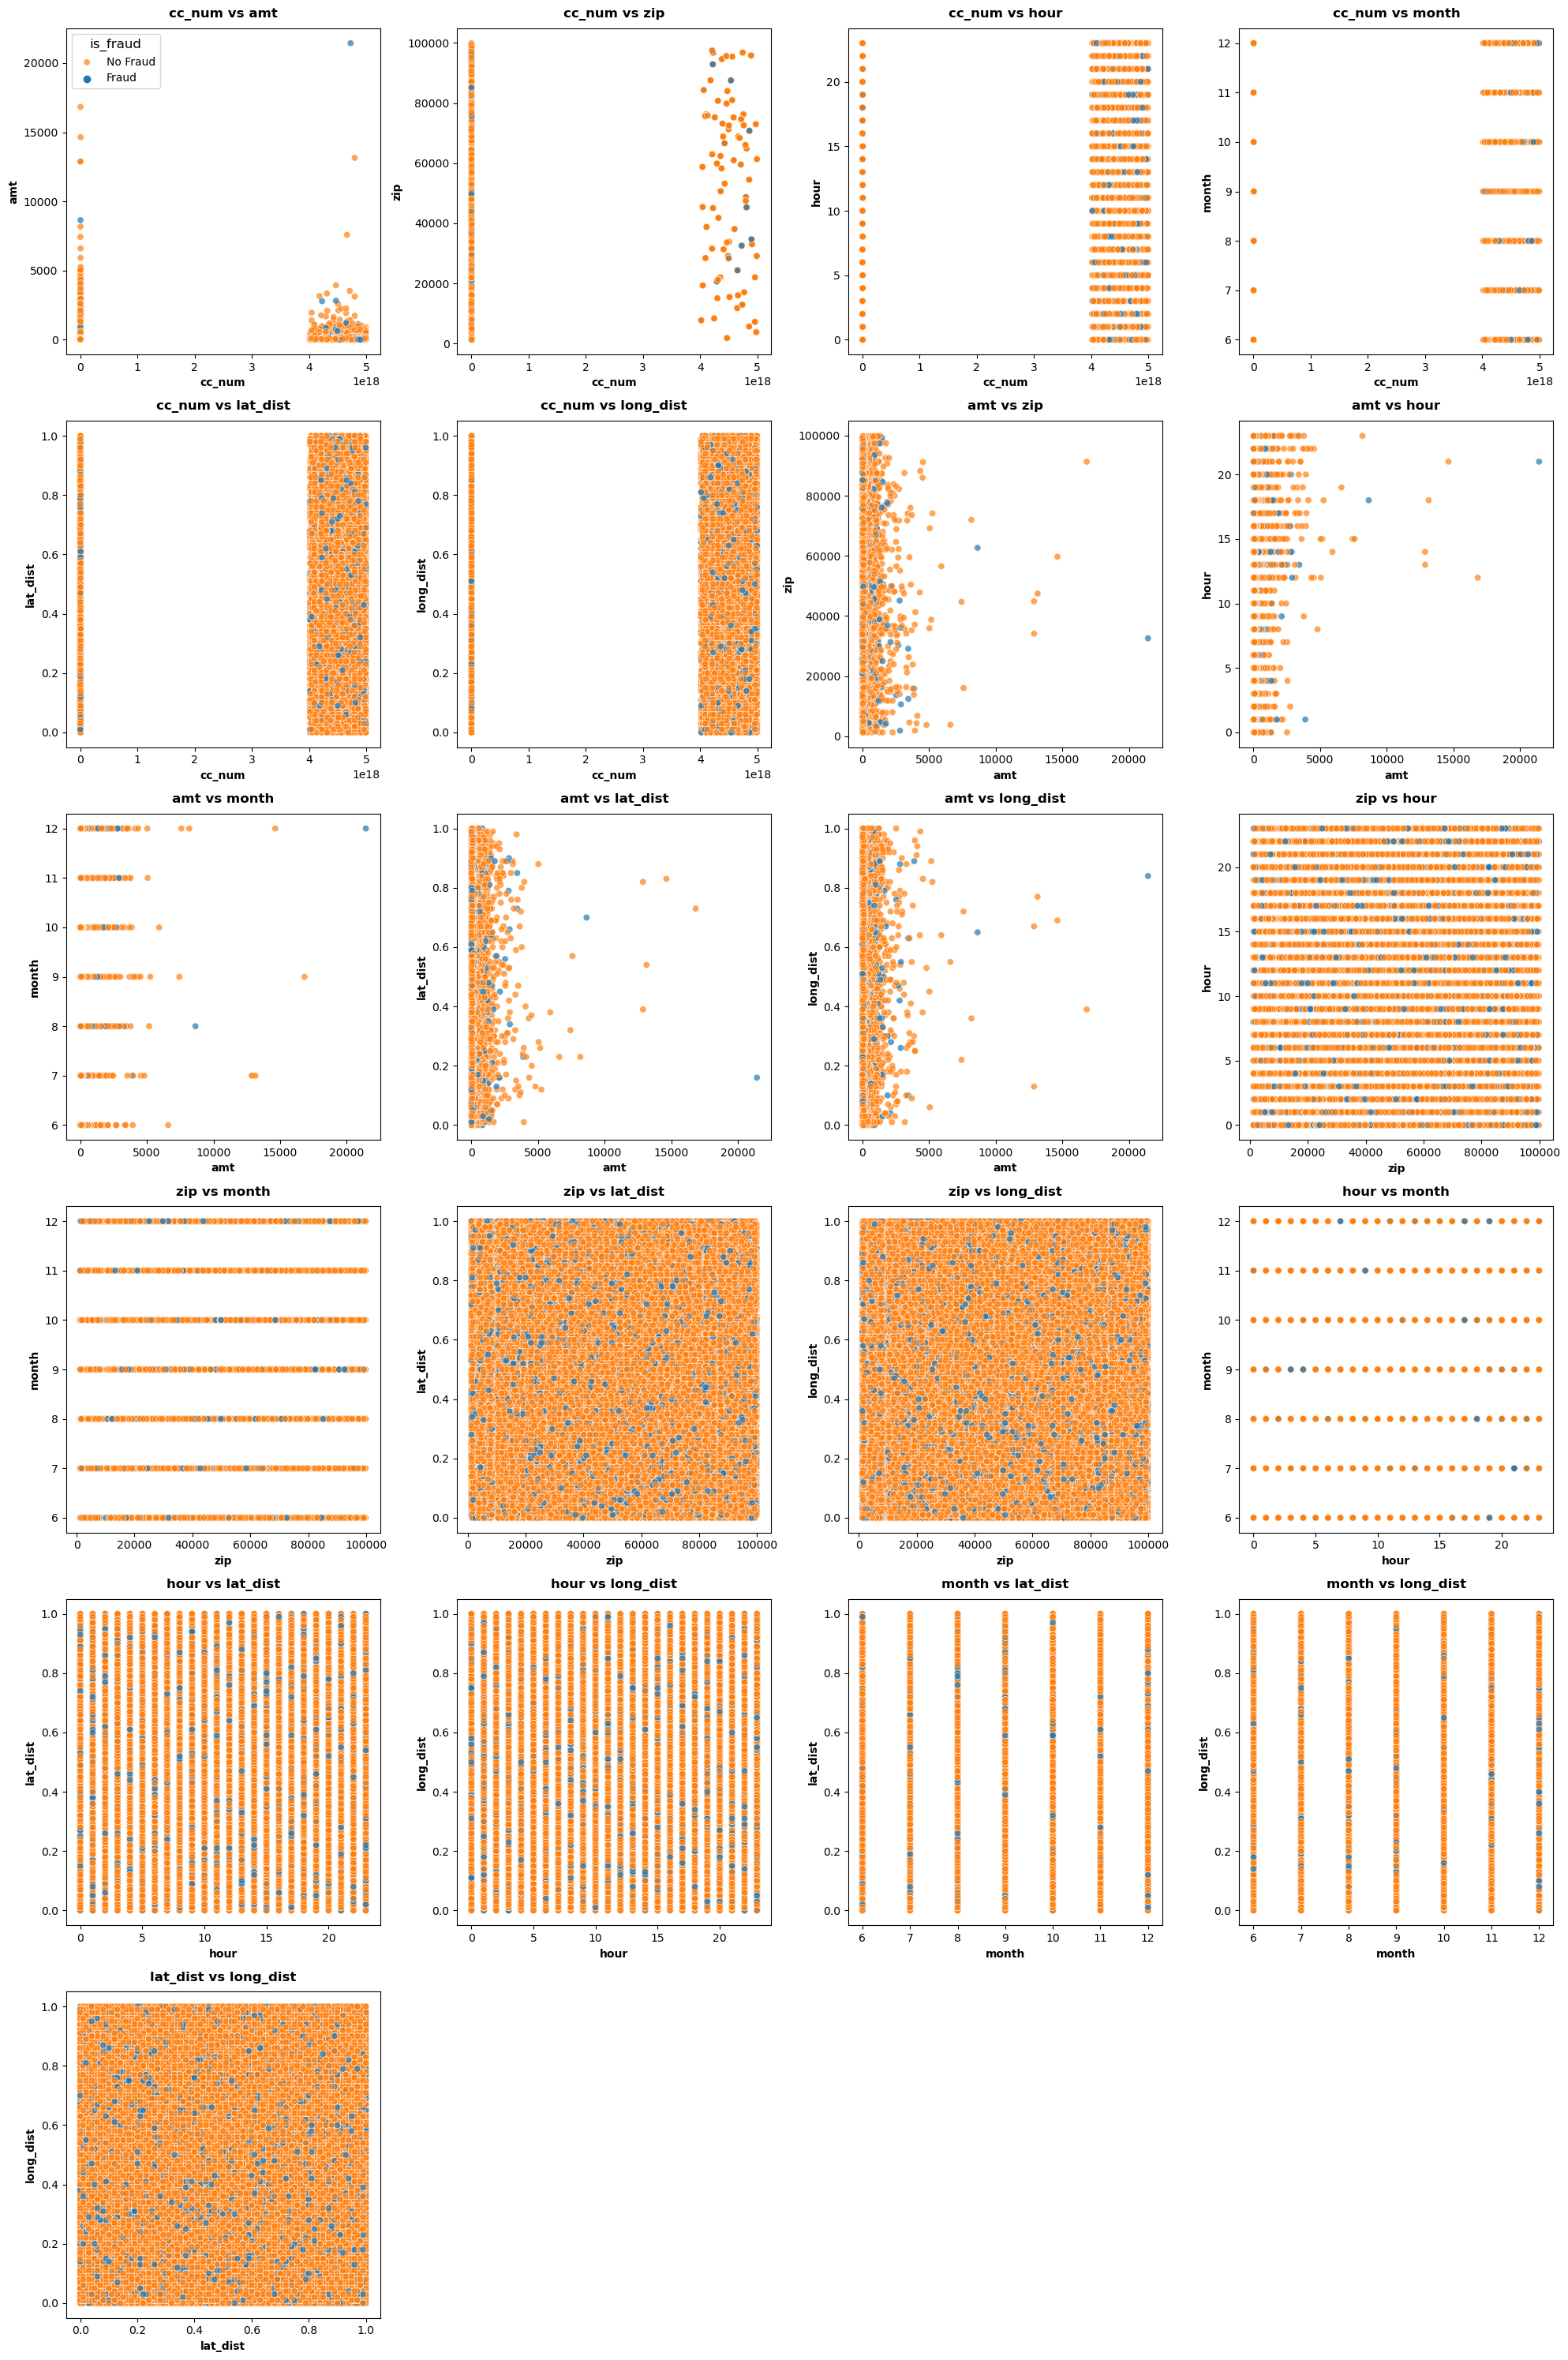

In [43]:
from itertools import combinations

palette = {0: "#1f77b4", 1: "#ff7f0e"}


def plot_scatter_grid(dataframe, variables, hue_var):
    num_plots = len(variables)
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.scatterplot(
            x=var[0],
            y=var[1],
            hue=hue_var,
            palette=palette,
            data=dataframe,
            ax=axes[i],
            alpha=0.7,
        )
        axes[i].set_title(
            f"{var[0]} vs {var[1]}", fontsize=12, fontweight="bold", pad=10
        )
        axes[i].set_xlabel(var[0], fontsize=10, fontweight="bold")
        axes[i].set_ylabel(var[1], fontsize=10, fontweight="bold")
        if i == 0:
            axes[i].legend(
                title="is_fraud",
                labels=["No Fraud", "Fraud"],
                fontsize=10,
                title_fontsize=12,
            )
        else:
            axes[i].legend().remove()

    for j in range(num_plots, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


comb = [col for col in df.columns if col not in "is_fraud"]
variables = list(combinations(comb, 2))

plot_scatter_grid(df, variables, "is_fraud")

#### **Checking For Outliers**


In [44]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[
        (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    ].any(axis=None):
        return True
    else:
        return False


def check_all_columns_outliers(dataframe):
    results = {}
    numeric_cols = dataframe.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        results[col] = check_outlier(dataframe, col)
    return results

In [45]:
check_all_columns_outliers(df)

{'cc_num': False,
 'amt': True,
 'zip': False,
 'hour': False,
 'month': False,
 'lat_dist': False,
 'long_dist': False}

#### **Box Plot For Vizualizing Outliers**


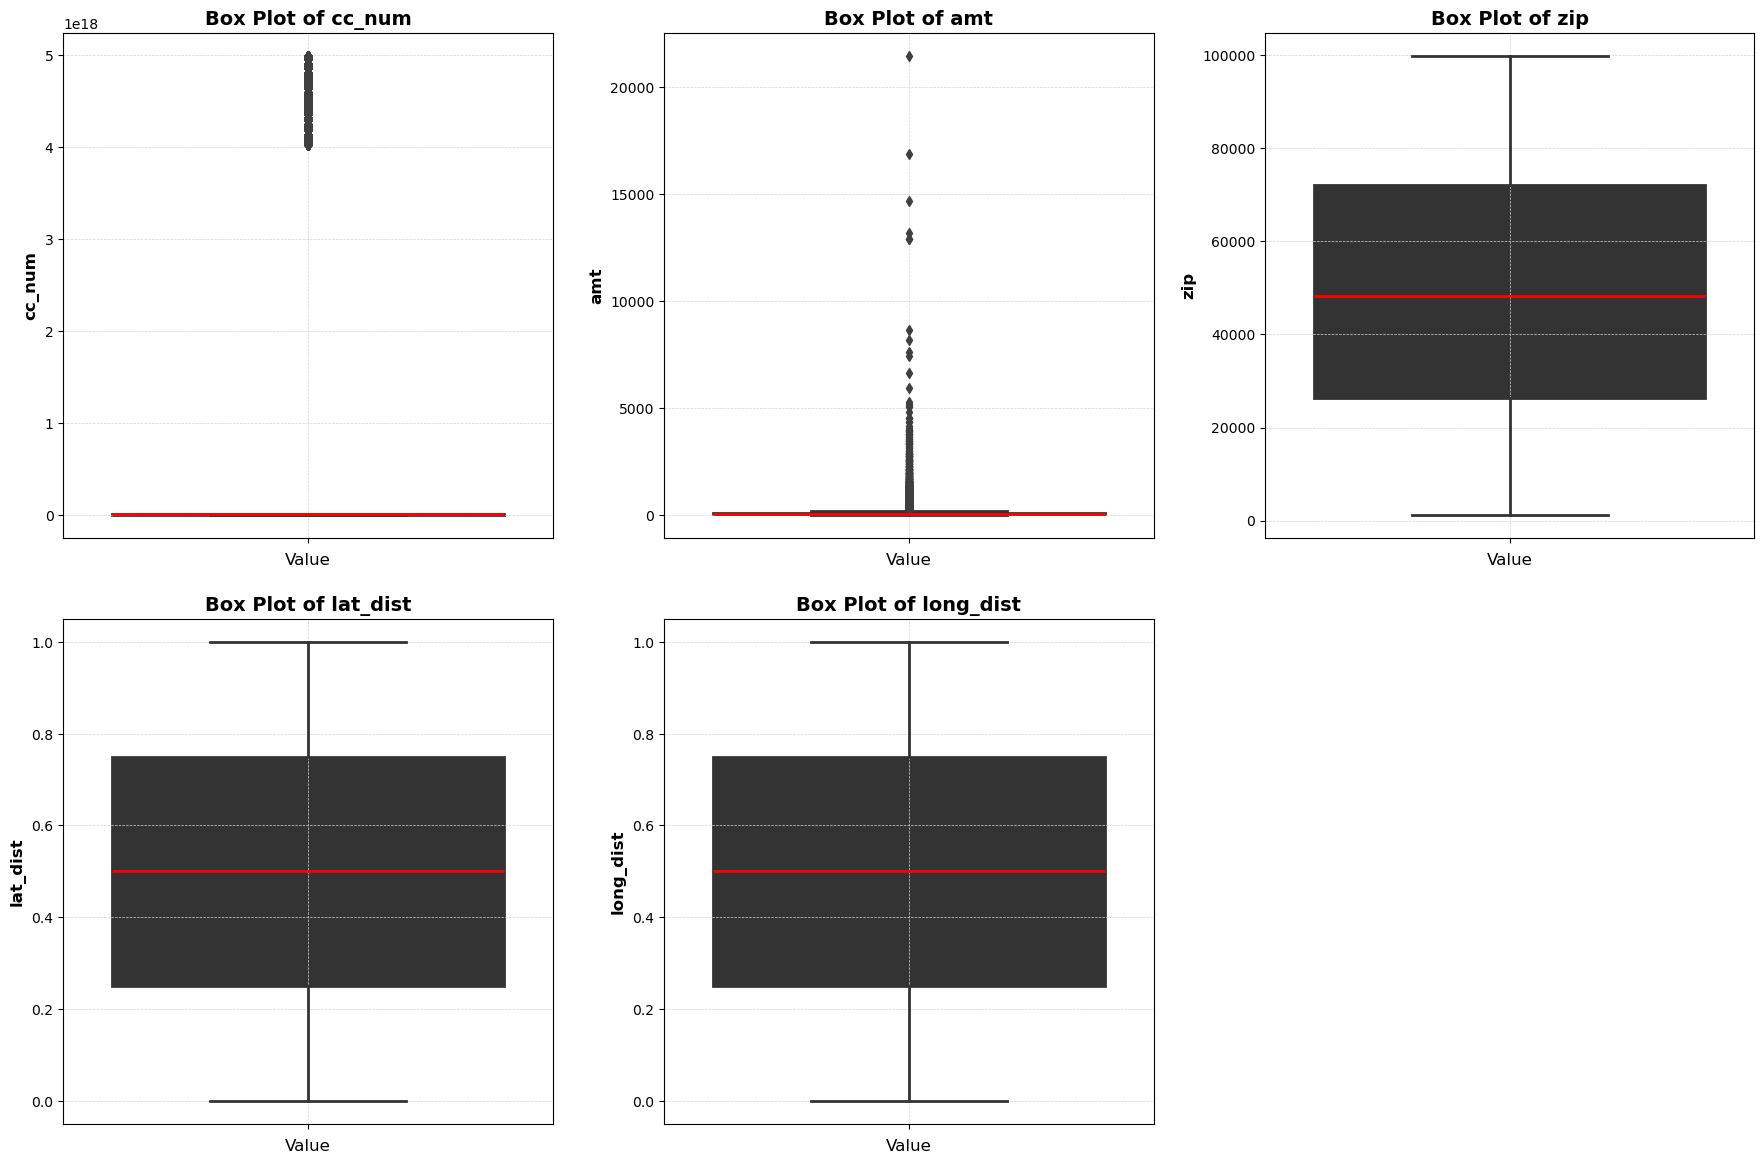

In [46]:
def plot_boxplot_per_variable(dataframe):
    numeric_cols = dataframe.select_dtypes(include=["int64", "float64"]).columns
    num_plots = len(numeric_cols)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    axes = axes.flatten()

    boxprops = dict(linewidth=2, color="#333333")
    whiskerprops = dict(linewidth=2, color="#333333")
    capprops = dict(linewidth=2, color="#333333")
    medianprops = dict(linewidth=2, color="r")

    for i, col in enumerate(numeric_cols):
        sns.boxplot(
            y=dataframe[col],
            ax=axes[i],
            orient="h",
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
        )
        axes[i].set_title(f"Box Plot of {col}", fontsize=14, fontweight="bold")
        axes[i].set_xlabel("Value", fontsize=12)
        axes[i].set_ylabel(col, fontsize=12, fontweight="bold")
        axes[i].tick_params(axis="both", labelsize=10)
        axes[i].grid(True, linestyle="--", linewidth=0.5, color="lightgray")

    for j in range(num_plots, len(axes)):
        axes[j].axis("off")

    plt.tight_layout(pad=2.0)
    plt.show()


plot_boxplot_per_variable(df)

#### **Handling the Outliers**


In [47]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


numeric_columns = df.select_dtypes(include=[np.number]).columns

variables_to_process = [col for col in numeric_columns if col != "is_fraud"]

for col in variables_to_process:
    print(f"{col}: {check_outlier(df, col)}")
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

cc_num: False
amt: True
zip: False
hour: False
month: False
lat_dist: False
long_dist: False


In [48]:
check_all_columns_outliers(df)

{'cc_num': False,
 'amt': False,
 'zip': False,
 'hour': False,
 'month': False,
 'lat_dist': False,
 'long_dist': False}

#### **Selecting Feature & Target**


In [49]:
y = df["is_fraud"]
X = df.drop("is_fraud", axis=1)

In [50]:
X.describe()

,cc_num,amt,zip,hour,month,lat_dist,long_dist
count,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000,159618.000
mean,416039644014534272.000,63.786,48868.351,12.824,9.502,0.500,0.500
std,1307281891662049536.000,76.735,26872.871,6.804,1.976,0.288,0.289
min,60416207185.000,1.000,1257.000,0.000,6.000,0.000,0.000
25%,180031000000000.000,9.560,26292.000,7.000,8.000,0.250,0.250
50%,3518760000000000.000,47.080,48202.000,14.000,10.000,0.500,0.500
75%,4634960000000000.000,82.870,72042.000,19.000,11.000,0.750,0.750
max,4992350000000000000.000,479.727,99921.000,23.000,12.000,1.000,1.000


#### **Scaling the Features**


In [51]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,cc_num,amt,zip,hour,month,lat_dist,long_dist
0,0.160,-0.081,-0.120,0.250,-0.333,0.380,0.580
1,947.308,0.066,-0.069,-0.667,0.667,-0.980,0.060
2,-0.783,-0.612,0.183,-0.333,0.000,-0.500,-0.620
3,-0.790,0.547,-0.824,-0.750,0.333,-0.260,-0.040
4,-0.783,0.446,-0.156,-0.500,0.333,-0.160,-0.920


#### **Train Test Split**


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=17
)

#### **Function to evaluate the model**


In [54]:
def eval_model(pred_outcome, model, model_name):
    accuracy = accuracy_score(y_test, pred_outcome)
    precision = precision_score(y_test, pred_outcome)
    recall = recall_score(y_test, pred_outcome)
    f1 = f1_score(y_test, pred_outcome)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(model_name.center(70, "-"))
    print(f"Accuracy: {round(accuracy, 4)}")
    print("\n")
    print(f"Precision: {round(precision, 4)}")
    print("\n")
    print(f"Recall: {round(recall, 4)}")
    print("\n")
    print(f"F1-score: {round(f1, 4)}")
    print("\n")
    print(f"ROC AUC: {round(roc_auc, 4)}")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
    }

### **Random Forest Classifier**


In [55]:
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=46)

In [56]:
rf_pred = rf_model.predict(X_test)

In [57]:
rf_metrics = eval_model(rf_pred, rf_model, "RF")

----------------------------------RF----------------------------------
Accuracy: 0.8983


Precision: 0.8984


Recall: 0.9999


F1-score: 0.9464


ROC AUC: 0.5012


In [58]:
from sklearn.metrics import confusion_matrix

rf_conf = confusion_matrix(y_test, rf_pred)
rf_conf

array([[    0,  4867],
       [    3, 43016]], dtype=int64)

### **Logistic Regression**


In [59]:
lr_model = LogisticRegression(random_state=46)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=46)

In [60]:
lr_pred = lr_model.predict(X_test)

In [61]:
lr_metrics = eval_model(lr_pred, lr_model, "LR")

----------------------------------LR----------------------------------
Accuracy: 0.8984


Precision: 0.8984


Recall: 1.0


F1-score: 0.9465


ROC AUC: 0.4929


In [62]:
lr_conf = confusion_matrix(y_test, lr_pred)
lr_conf

array([[    0,  4867],
       [    0, 43019]], dtype=int64)

### **KNN**


In [63]:
import math

n = math.floor(math.sqrt(len(df)))

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=n)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=399)

In [65]:
knn_pred = knn_model.predict(X_test)

In [66]:
knn_metrics = eval_model(knn_pred, knn_model, "KNN")

---------------------------------KNN----------------------------------
Accuracy: 0.8984


Precision: 0.8984


Recall: 1.0


F1-score: 0.9465


ROC AUC: 0.5026


In [67]:
knn_conf = confusion_matrix(y_test, knn_pred)
knn_conf

array([[    0,  4867],
       [    0, 43019]], dtype=int64)

### **Metric to compare the models**


In [68]:
metrics = {
    "model": ["KNN", "RF", "LR"],
    "accuracy": [
        knn_metrics["accuracy"],
        rf_metrics["accuracy"],
        lr_metrics["accuracy"],
    ],
    "precision": [
        knn_metrics["precision"],
        rf_metrics["precision"],
        lr_metrics["precision"],
    ],
    "recall": [knn_metrics["recall"], rf_metrics["recall"], lr_metrics["recall"]],
    "f1": [knn_metrics["f1"], rf_metrics["f1"], lr_metrics["f1"]],
    "roc_auc": [knn_metrics["roc_auc"], rf_metrics["roc_auc"], lr_metrics["roc_auc"]],
}

In [69]:
metrics = pd.DataFrame(metrics)

In [70]:
metrics

,model,accuracy,precision,recall,f1,roc_auc
0,KNN,0.898,0.898,1.000,0.946,0.503
1,RF,0.898,0.898,1.000,0.946,0.501
2,LR,0.898,0.898,1.000,0.946,0.493


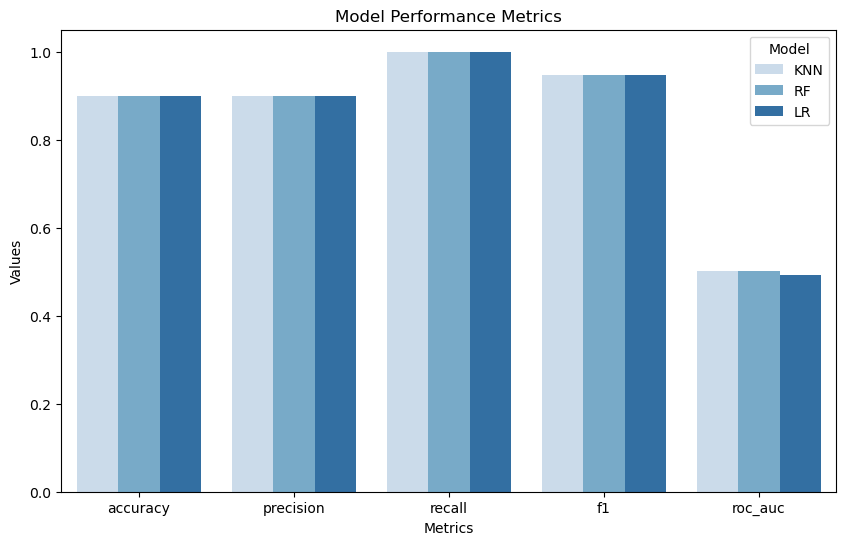

In [74]:
metrics_melted = metrics.melt(id_vars="model", var_name="metric", value_name="value")
plt.figure(figsize=(10, 6))
sns.barplot(x="metric", y="value", palette="Blues", hue="model", data=metrics_melted)
plt.title("Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.legend(title="Model")
plt.show()